In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [2]:

# /kaggle/input/dataquest2020/energy_test.csv
# /kaggle/input/dataquest2020/energy_train.csv
# /kaggle/input/dataquest2020/sample_submission.csv

df_train = pd.read_csv('/kaggle/input/dataquest2020/energy_train.csv')
df_test = pd.read_csv("/kaggle/input/dataquest2020/energy_test.csv")
df_sub = pd.read_csv("/kaggle/input/dataquest2020/sample_submission.csv")

**Data Analysis**

In [3]:

df_train.columns

Index(['id', 'date', 'WattHour', 'luminousity', 'degree_C1', 'moisture_1',
       'degree_C2', 'moisture_2', 'degree_C3', 'moisture_3', 'degree_C4',
       'moisture_4', 'degree_C5', 'moisture_5', 'degree_C6', 'moisture_6',
       'degree_C7', 'moisture_7', 'degree_C8', 'moisture_8', 'degree_C9',
       'moisture_9', 'degree_Cout', 'Pressure', 'moisture_out', 'Wind',
       'Clarity', 'dew_index', 'random_variable_1', 'random_variable_2'],
      dtype='object')

In [4]:

df_train['WattHour'].describe()

count    15000.000000
mean        98.751333
std        106.421877
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: WattHour, dtype: float64

In [5]:
df_train.head()

,id,date,WattHour,luminousity,degree_C1,moisture_1,degree_C2,moisture_2,degree_C3,moisture_3,...,degree_C9,moisture_9,degree_Cout,Pressure,moisture_out,Wind,Clarity,dew_index,random_variable_1,random_variable_2
0,1,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,3,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,4,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,5,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,NaN,45.000000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


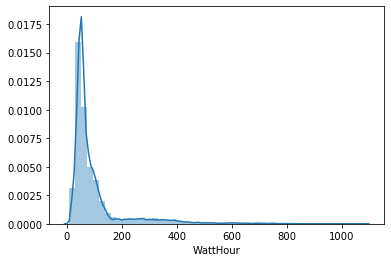

In [6]:
sns.distplot(df_train['WattHour']);

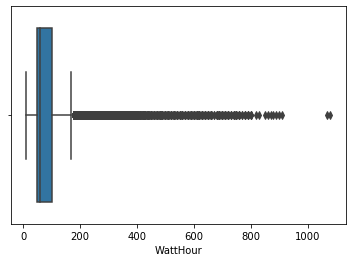

In [7]:
sns.boxplot(df_train['WattHour']);

In [8]:

print("Skewness: %f" % df_train['WattHour'].skew())
print("Kurtosis: %f" % df_train['WattHour'].kurt())

Skewness: 3.284450
Kurtosis: 12.794710


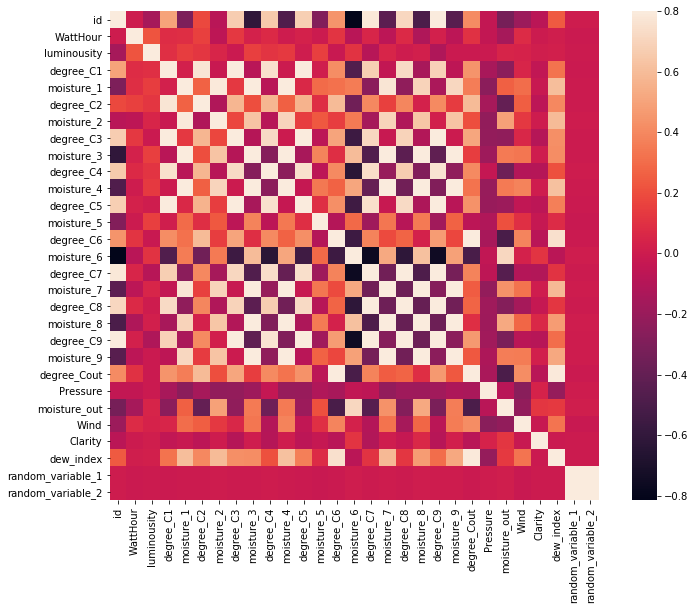

In [9]:

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [10]:
corrmat.WattHour 

id                  -0.000057
WattHour             1.000000
luminousity          0.223585
degree_C1            0.085909
moisture_1           0.090329
degree_C2            0.157046
moisture_2          -0.059584
degree_C3            0.127074
moisture_3           0.034468
degree_C4            0.074127
moisture_4          -0.001280
degree_C5            0.034020
moisture_5          -0.003534
degree_C6            0.118191
moisture_6          -0.081692
degree_C7            0.052300
moisture_7          -0.069853
degree_C8            0.070779
moisture_8          -0.115603
degree_C9            0.027337
moisture_9          -0.067476
degree_Cout          0.102267
Pressure            -0.041420
moisture_out        -0.148025
Wind                 0.076209
Clarity             -0.007147
dew_index            0.015312
random_variable_1   -0.008751
random_variable_2   -0.008751
Name: WattHour, dtype: float64

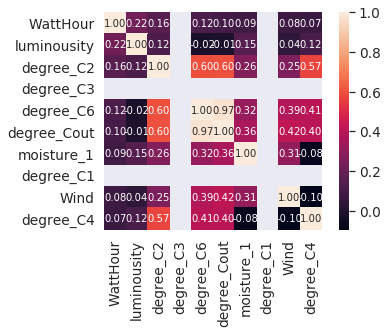

In [11]:

k = 10 
cols = corrmat.nlargest(k, 'WattHour')['WattHour'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [12]:
df_train.isnull().sum()

id                      0
date                    0
WattHour                0
luminousity             0
degree_C1            3918
moisture_1              0
degree_C2               0
moisture_2              0
degree_C3            2308
moisture_3              0
degree_C4               0
moisture_4              0
degree_C5               0
moisture_5              0
degree_C6               0
moisture_6              0
degree_C7               0
moisture_7              0
degree_C8               0
moisture_8              0
degree_C9               0
moisture_9           4600
degree_Cout             0
Pressure                0
moisture_out            0
Wind                    0
Clarity                 0
dew_index               0
random_variable_1       0
random_variable_2       0
dtype: int64

In [13]:
df_train.describe()

,id,WattHour,luminousity,degree_C1,moisture_1,degree_C2,moisture_2,degree_C3,moisture_3,degree_C4,...,degree_C9,moisture_9,degree_Cout,Pressure,moisture_out,Wind,Clarity,dew_index,random_variable_1,random_variable_2
count,15000.000000,15000.000000,15000.000000,11082.000000,15000.000000,15000.000000,15000.000000,12692.000000,15000.000000,15000.000000,...,15000.000000,10400.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,98.751333,4.389333,21.163095,40.223645,19.658822,40.688595,21.566924,39.545294,20.136782,...,18.743022,41.646994,5.904323,755.512243,81.749333,4.299733,38.760367,2.761777,24.989925,24.989925
std,4330.271354,106.421877,8.453314,1.233771,3.570557,1.524552,3.387494,1.527581,3.149775,1.540814,...,1.454431,3.965262,4.189812,7.928961,12.980934,2.589470,12.570409,3.577249,14.508441,14.508441
min,1.000000,10.000000,0.000000,16.790000,27.733333,16.100000,25.763333,17.200000,32.626667,15.100000,...,14.890000,31.033333,-5.000000,729.300000,31.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,3750.750000,50.000000,0.000000,20.390000,37.590000,18.600000,38.400000,20.500000,37.230000,19.166667,...,17.790000,38.666667,2.983333,750.650000,73.000000,2.000000,29.000000,0.366667,12.566582,12.566582
50%,7500.500000,60.000000,0.000000,21.290000,39.790000,19.600000,40.760000,21.600000,38.831667,20.206481,...,18.600000,40.926667,5.850000,756.166667,85.250000,4.000000,40.000000,2.833333,24.858659,24.858659
75%,11250.250000,100.000000,10.000000,22.066667,42.933333,20.666667,43.290000,22.600000,42.000000,21.260000,...,20.050000,44.223333,8.966667,761.766667,92.000000,6.000000,40.000000,5.300000,37.675790,37.675790
max,15000.000000,1080.000000,70.000000,24.100000,63.360000,24.600000,56.026667,27.600000,50.163333,23.760000,...,23.840000,53.326667,19.700000,772.300000,100.000000,14.000000,66.000000,11.400000,49.996530,49.996530


In [14]:
WattHour_scaled = StandardScaler().fit_transform(df_train['WattHour'][:,np.newaxis]);
low_range = WattHour_scaled[WattHour_scaled[:,0].argsort()][:10]
high_range= WattHour_scaled[WattHour_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.8339854 ]
 [-0.8339854 ]
 [-0.8339854 ]
 [-0.8339854 ]
 [-0.8339854 ]
 [-0.8339854 ]
 [-0.8339854 ]
 [-0.8339854 ]
 [-0.8339854 ]
 [-0.74001663]]

outer range (high) of the distribution:
[[6.87145411]
 [7.05939166]
 [7.15336043]
 [7.24732921]
 [7.34129798]
 [7.43526675]
 [7.52923553]
 [7.6232043 ]
 [9.1267047 ]
 [9.22067347]]


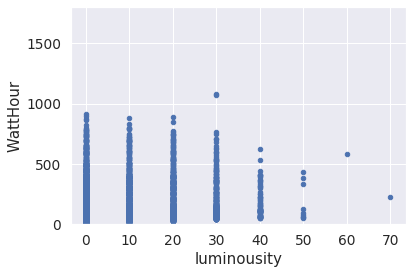

In [15]:
var = 'luminousity'
data = pd.concat([df_train['WattHour'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='WattHour', ylim=(0,1800));


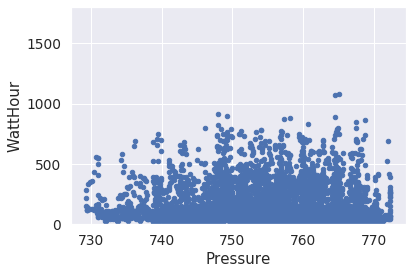

In [16]:
var = 'Pressure'
data = pd.concat([df_train['WattHour'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='WattHour', ylim=(0,1800));

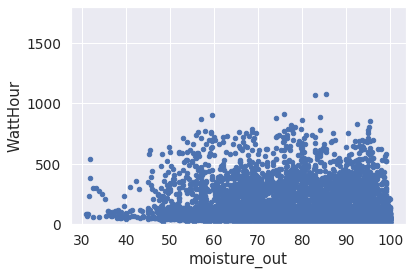

In [17]:
var = 'moisture_out'
data = pd.concat([df_train['WattHour'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='WattHour', ylim=(0,1800));

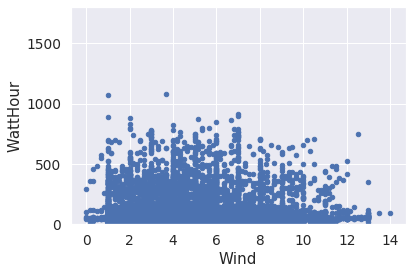

In [18]:
#bivariate analysis saleprice/grlivarea
var = 'Wind'
data = pd.concat([df_train['WattHour'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='WattHour', ylim=(0,1800));

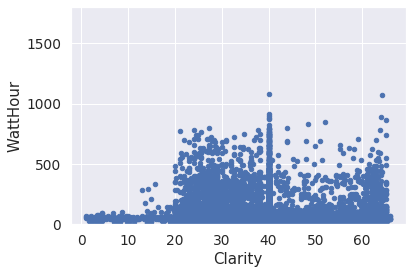

In [19]:
var = 'Clarity'
data = pd.concat([df_train['WattHour'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='WattHour', ylim=(0,1800));

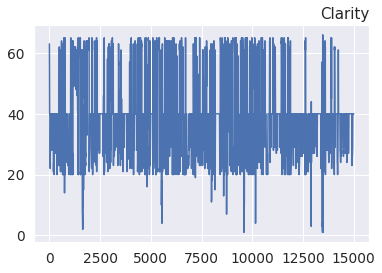

In [20]:
values = data.values
i = 1
groups=[1]
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(data.columns[group], y=1, loc='right')
    i += 1
plt.show()

**Data Preprocessing**

In [21]:
df_test['WattHour'] = df_sub['WattHour']
new_train = pd.concat((df_train,
                      df_test))
df_test = df_test.drop(['WattHour'],1)
wat = new_train['WattHour']
new_train = new_train.set_index("WattHour")
new_train = new_train.drop(0, axis=0)
new_train = new_train.reset_index()
new_train = new_train.drop(columns= ["random_variable_1","random_variable_2"])
df_train_1 = new_train
df_test_1 = df_test
df_test_1 = df_test_1.drop(columns = ["random_variable_1","random_variable_2"])
all_data = pd.concat((df_train_1.drop(['WattHour'],1),
                      df_test_1))

In [22]:
import datetime
all_data['date'] = [datetime.datetime.strptime(d, "%Y-%m-%d %H:%M:%S") for d in all_data["date"]]
all_data['Date'] = [datetime.datetime.date(d) for d in all_data['date']] 
all_data['Time'] = [datetime.datetime.time(d) for d in all_data['date']]

In [23]:
all_data = all_data.drop(columns = ["date"])

In [24]:
df_train_1["WattHour"] = np.log1p(df_train_1["WattHour"])

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
print(numeric_feats)
skewed_feats = df_train_1[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())

Index(['id', 'luminousity', 'degree_C1', 'moisture_1', 'degree_C2',
       'moisture_2', 'degree_C3', 'moisture_3', 'degree_C4', 'moisture_4',
       'degree_C5', 'moisture_5', 'degree_C6', 'moisture_6', 'degree_C7',
       'moisture_7', 'degree_C8', 'moisture_8', 'degree_C9', 'moisture_9',
       'degree_Cout', 'Pressure', 'moisture_out', 'Wind', 'Clarity',
       'dew_index'],
      dtype='object')


**Model Training**

In [25]:
X_train = all_data[:df_train_1.shape[0]]
X_test = all_data[df_train_1.shape[0]:]
y = df_train_1.WattHour

In [26]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [27]:
model_ridge = Ridge()

In [28]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
# alphas = [15]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

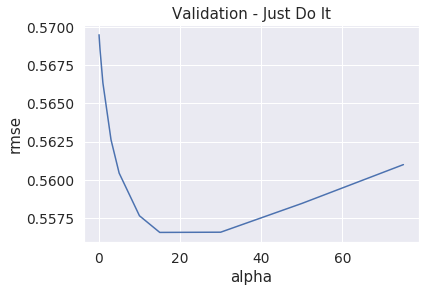

In [29]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [30]:
cv_ridge.min()

0.5565413567144282

In [31]:
rmse_cv(model_ridge).mean()

0.5663431372975662

In [32]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)


In [33]:
rmse_cv(model_lasso).mean()

0.5595716858930285

In [34]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

In [35]:
print("Lasso picked" + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked214 variables and eliminated the other 92 variables


In [36]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

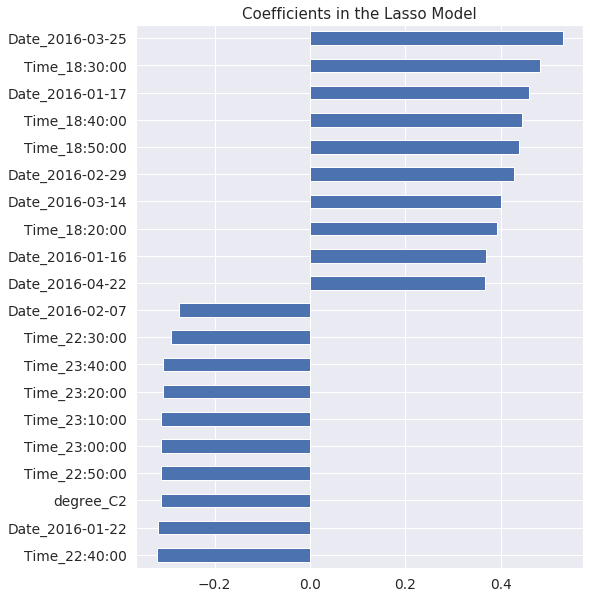

In [37]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

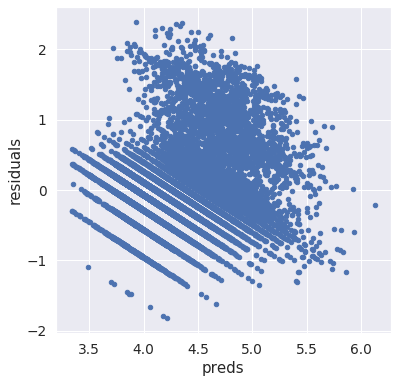

In [38]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [39]:
import xgboost as xgb

In [40]:
dtrain = xgb.DMatrix(X_train, label = y)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

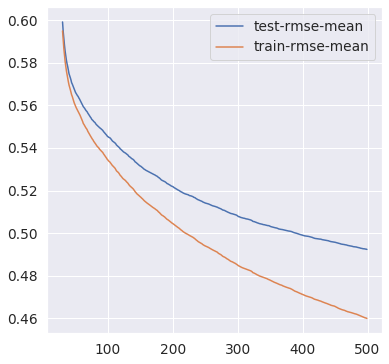

In [41]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [42]:
model_xgb = xgb.XGBRegressor(n_estimators=1500, max_depth=3, learning_rate=0.1)
model_xgb.fit(X_train, y)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

**Predicting Output**

In [43]:
xgb_preds = np.expm1(model_xgb.predict(X_test))
lasso_preds = np.expm1(model_lasso.predict(X_test))

In [44]:
np.expm1(xgb_preds)

array([3.6369015e+34, 2.9476355e+34, 4.8799460e+33, ..., 9.0293227e+22,
       3.8121274e+21, 1.0565850e+22], dtype=float32)

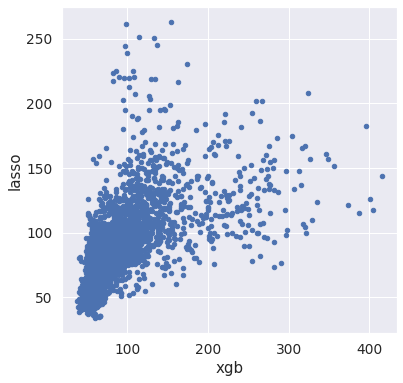

In [45]:
predictions = pd.DataFrame({"xgb":xgb_preds, "lasso":lasso_preds})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

In [46]:
preds1 = 0.5*lasso_preds + 0.5*xgb_preds
preds2 = 0.7*lasso_preds + 0.3*xgb_preds
preds3 = 0.3*lasso_preds + 0.7*xgb_preds

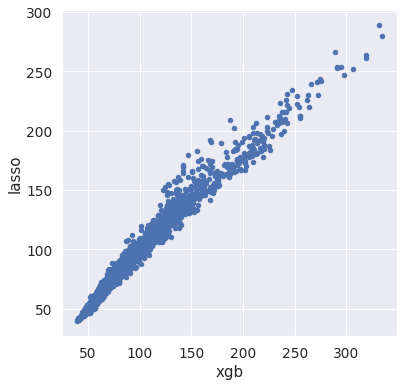

In [47]:
predictions = pd.DataFrame({"xgb":preds3, "lasso":preds1})
predictions.plot(x = "xgb", y = "lasso", kind = "scatter")

**Creating Submission file**

In [48]:
re=pd.read_csv("/kaggle/input/dataquest2020/sample_submission.csv")
y_pred=[]
for i in preds1 : 
    i  = int(i)
    y_pred.append(i)

for i in range(len(re.WattHour)):
    if re.WattHour[i]!= 0:
        y_pred[i] = re.WattHour[i]    
        
df=pd.DataFrame(y_pred)


re=re.drop(['WattHour'],axis=1)
re.insert(1,"WattHour",df)
re.to_csv("result6.csv", index = False)